In [2]:
import numpy as np
import pyplume as pl
import time
from matplotlib import pyplot as plt

In [4]:
start = time.time()
T = pl.loadmat(r'Z:\Jesse\Plumes\CarbonDioxide\Neutral\co2.h2pt5.a\NBL_3D_T_h2pt5')
end = time.time()
print((end-start)/60)

5.045426432291666


In [16]:
nx = 45
ny = 45
nz = 700
dx = 40
dy = 40
dz = 10
dt = 10
nt = int(int(np.shape(T)[0])/nx/ny/nz)

In [9]:
T = np.reshape(T,[nx,ny,nz,nt],order = "F")

In [11]:
gT = pl.gprimeT(T,300,9.81)

In [24]:
height=pl.plumeheight(gT,0.0001,dt,dz,400)

In [25]:
def plumeplot(data,dataname,dt,marksize=250):
    plt.figure(figsize=(10,5))
    color = 'k'
    nt = np.shape(data)[0]
    x = list(range(0,(nt)*dt,dt))
    plt.plot(x[0:np.shape(data)[0]],data,color = color)
    plt.locator_params(axis='x', nbins=300)
    plt.grid()
    plt.xticks(np.arange(min(x), max(x)+1, marksize))
    plt.ylabel('z/D');plt.xlabel('Time')
    plt.savefig(dataname +'.png')

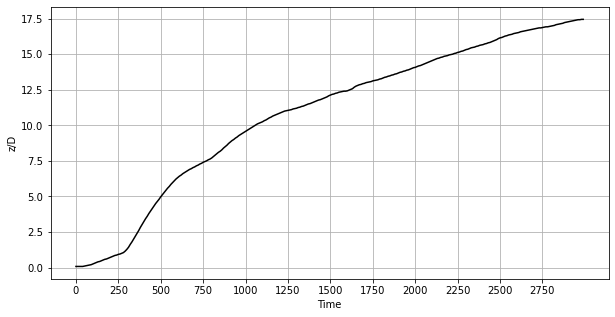

In [26]:
plumeplot(height,"nbl.co2.h.2.5_plumeheight",dt)